In [1]:
%config IPCompleter.greedy=True
!python --version

Python 3.7.4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

!pwd

/Users/danielchan/Dropbox/Mobile_Upload


In [3]:
df = pd.read_csv('./Validations and Submission as of 10282019 5_05_PM.csv', index_col=None)

In [4]:
df.head()

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,338,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-28 02:02:27,2019-10-28 02:02:29,1.0.201910230000.2
1,343,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,NaN,2019-10-28 07:25:18,2019-10-28 07:25:21,1.0
2,352,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,NaN,2019-10-28 08:05:07,2019-10-28 08:05:12,1.0
3,365,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,NaN,2019-10-28 08:32:42,2019-10-28 08:32:46,1.0
4,368,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-28 08:33:43,2019-10-28 08:33:47,1.0


In [5]:
df.shape

(487, 12)

In [6]:
df.dtypes

MOBILE_APP_REQUEST_ID     int64
INSERT_TS                object
RESPONSE_STATUS_ID        int64
DEVICE                   object
DEVICE_OS                object
RESPONSE_STATUS_NAME     object
MOBILE_SUBMISSION_ID     object
Size                     object
Page Count               object
INSERT_TS.1              object
LAST_UPDATE_TS           object
CLIENT_VERSION           object
dtype: object

In [7]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['INSERT_TS.1'] = pd.to_datetime(df['INSERT_TS.1'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])

In [8]:
df.dtypes

MOBILE_APP_REQUEST_ID             int64
INSERT_TS                datetime64[ns]
RESPONSE_STATUS_ID                int64
DEVICE                           object
DEVICE_OS                        object
RESPONSE_STATUS_NAME             object
MOBILE_SUBMISSION_ID             object
Size                             object
Page Count                       object
INSERT_TS.1              datetime64[ns]
LAST_UPDATE_TS           datetime64[ns]
CLIENT_VERSION                   object
dtype: object

In [9]:
df['INSERT_TS'].dt.time

0      02:02:27
1      07:25:18
2      08:05:07
3      08:32:42
4      08:33:43
         ...   
482    16:56:29
483    16:59:00
484    17:00:25
485    17:01:33
486    17:02:19
Name: INSERT_TS, Length: 487, dtype: object

In [10]:
df.head()

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,338,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-28 02:02:27,2019-10-28 02:02:29,1.0.201910230000.2
1,343,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,NaN,2019-10-28 07:25:18,2019-10-28 07:25:21,1.0
2,352,2019-10-28 08:05:07,300100,SM-G960U,28,Successful validation.,NaN,NaN,NaN,2019-10-28 08:05:07,2019-10-28 08:05:12,1.0
3,365,2019-10-28 08:32:42,300100,SM-G960U,28,Successful validation.,NaN,NaN,NaN,2019-10-28 08:32:42,2019-10-28 08:32:46,1.0
4,368,2019-10-28 08:33:43,300200,SM-G960U,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-28 08:33:43,2019-10-28 08:33:47,1.0


In [11]:
df = df.drop(columns=["RESPONSE_STATUS_NAME", "MOBILE_SUBMISSION_ID", "MOBILE_APP_REQUEST_ID", "INSERT_TS.1"])
df.head()

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,NaN,NaN,2019-10-28 08:33:47,1.0


In [12]:
df.dtypes

INSERT_TS             datetime64[ns]
RESPONSE_STATUS_ID             int64
DEVICE                        object
DEVICE_OS                     object
Size                          object
Page Count                    object
LAST_UPDATE_TS        datetime64[ns]
CLIENT_VERSION                object
dtype: object

In [13]:
df['LAST_UPDATE_TS'].sub(df['INSERT_TS'], axis=0)

0     00:00:02
1     00:00:03
2     00:00:05
3     00:00:04
4     00:00:04
        ...   
482   00:00:00
483   00:00:01
484   00:00:01
485   00:00:01
486   00:00:01
Length: 487, dtype: timedelta64[ns]

In [14]:
df["Page Count"] = df["Page Count"].str.extract(r'\b(\w+)$', expand=True)

In [15]:
df["Size"] = df["Size"].str.extract(r'\b(\w+)$', expand=True)
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,NaN,NaN,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,NaN,NaN,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,NaN,NaN,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,NaN,NaN,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,NaN,NaN,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,NaN,NaN,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,NaN,NaN,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [16]:
df.dtypes

INSERT_TS             datetime64[ns]
RESPONSE_STATUS_ID             int64
DEVICE                        object
DEVICE_OS                     object
Size                          object
Page Count                    object
LAST_UPDATE_TS        datetime64[ns]
CLIENT_VERSION                object
dtype: object

In [17]:
df["Size"] = pd.to_numeric(df.Size)
df["Page Count"] = pd.to_numeric(df["Page Count"])
df.dtypes

INSERT_TS             datetime64[ns]
RESPONSE_STATUS_ID             int64
DEVICE                        object
DEVICE_OS                     object
Size                         float64
Page Count                   float64
LAST_UPDATE_TS        datetime64[ns]
CLIENT_VERSION                object
dtype: object

In [18]:
df["Size"].fillna(0, inplace=True)
df["Page Count"].fillna(0, inplace=True)

In [19]:
df["Size"] = df["Size"].astype(int)
df["Page Count"] = df["Page Count"].astype(int)
df.head(20)


,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,0,0,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,0,0,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,0,0,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,0,0,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,0,0,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,0,0,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,0,0,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,0,0,2019-10-28 08:59:28,1.0.201910230000.2
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2


In [20]:
df.dtypes

INSERT_TS             datetime64[ns]
RESPONSE_STATUS_ID             int64
DEVICE                        object
DEVICE_OS                     object
Size                           int64
Page Count                     int64
LAST_UPDATE_TS        datetime64[ns]
CLIENT_VERSION                object
dtype: object

In [21]:
print ("Number of Unsuccessful logins: ",df[ df["RESPONSE_STATUS_ID"] == 300200 ].shape[0])
print ("Number of Successful logins: ",df[ df["RESPONSE_STATUS_ID"] == 300100 ].shape[0])
df_submit = df[ df["RESPONSE_STATUS_ID"] == 400100 ]["Page Count"]
print ("Number of Submissions: ",df_submit.shape[0])
print ("Number of Pages Submitted: ",df["Page Count"].sum())
print ("Number of iOS devices:", df[ df["CLIENT_VERSION"] == "1.0.201910230000.2" ].shape[0] )
print ("Number of Android devices:", df[ df["CLIENT_VERSION"] == "1.0" ].shape[0]  )

Number of Unsuccessful logins:  127
Number of Successful logins:  211
Number of Submissions:  134
Number of Pages Submitted:  289
Number of iOS devices: 287
Number of Android devices: 200


In [22]:
df_submit.describe()


count    134.000000
mean       1.440299
std        0.862861
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Page Count, dtype: float64

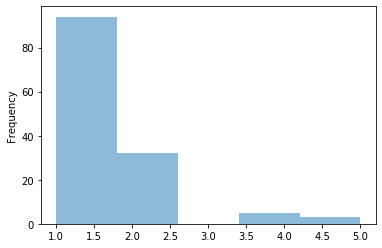

In [23]:
df_submit.plot.hist(bins=5, alpha=0.5)

In [24]:
device = df.groupby(["DEVICE"])["DEVICE"].count()
device = device.sort_values(ascending = False).head(20)
device

DEVICE
iPhone 8 Plus       66
iPhone XR           42
iPhone 8            36
iPhone 7 Plus       31
iPhone XS Max       29
SM-G960U            19
iPhone 6s           15
SM-G975U            14
iPhone X            13
iPhone SE           13
SAMSUNG-SM-J327A    12
moto e5 cruise      10
iPhone 6s Plus      10
iPhone XS            9
iPhone 7             9
XT1635-01            7
SM-G950U             7
LM-G820              6
SM-G965U             6
LG-H918              6
Name: DEVICE, dtype: int64

In [25]:
logins = df[ (df["RESPONSE_STATUS_ID"] == 300200) | (df["RESPONSE_STATUS_ID"] == 300100) ]
logins.shape

(338, 8)

In [26]:
logins.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,0,0,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,0,0,2019-10-28 07:25:21,1.0
2,2019-10-28 08:05:07,300100,SM-G960U,28,0,0,2019-10-28 08:05:12,1.0
3,2019-10-28 08:32:42,300100,SM-G960U,28,0,0,2019-10-28 08:32:46,1.0
4,2019-10-28 08:33:43,300200,SM-G960U,28,0,0,2019-10-28 08:33:47,1.0
5,2019-10-28 08:34:22,300100,SM-G960U,28,0,0,2019-10-28 08:34:22,1.0
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,0,0,2019-10-28 08:57:17,1.0.201910230000.2
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,0,0,2019-10-28 08:59:28,1.0.201910230000.2
11,2019-10-28 09:04:58,300200,iPhone 8 Plus,13.1.2,0,0,2019-10-28 09:05:06,1.0.201910230000.2
13,2019-10-28 09:07:18,300200,iPhone 8 Plus,13.1.2,0,0,2019-10-28 09:07:19,1.0.201910230000.2


In [27]:
iP8 = logins[ (logins["DEVICE"]=="iPhone 8 Plus") & (logins["RESPONSE_STATUS_ID"] == 300100) ]

In [28]:
iP8["Time_Lag"] = iP8["INSERT_TS"] - iP8["INSERT_TS"].shift(1) 

/Users/danielchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
iP8["Time_Lag"].dt.total_seconds()

40        NaN
83     4030.0
84       26.0
93      687.0
189    4105.0
196     424.0
223    1836.0
244    1189.0
297    2738.0
317    1711.0
319     197.0
358    2513.0
452    4229.0
463     567.0
467     219.0
Name: Time_Lag, dtype: float64

In [30]:
iP8["Time_Lag"]

40         NaT
83    01:07:10
84    00:00:26
93    00:11:27
189   01:08:25
196   00:07:04
223   00:30:36
244   00:19:49
297   00:45:38
317   00:28:31
319   00:03:17
358   00:41:53
452   01:10:29
463   00:09:27
467   00:03:39
Name: Time_Lag, dtype: timedelta64[ns]